#Импорт необходимых библиотек

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from PIL import Image
from matplotlib.pyplot import figure

#Приводим таблицу в удобный для работы вид

In [52]:
#считываем данные из файла в таблицу
df = pd.read_csv('https://raw.githubusercontent.com/Pash1i/andan_2023_project/updates/lemmatized.csv')

#удаляем ненужные столбы дубликата индексов и авторов (потому что он один)
df = df.drop(['Unnamed: 0', 'author'], axis=1)

#потом оказалось, что значение True в столбце 'is_repost?' имеет только мусор и реклама, поэтому удаляем и соответствующие строки, и столбец
df = df.drop(df[df['is_repost?']==True].index)
df = df.drop('is_repost?', axis=1)
df = df.reset_index(drop=True)

#получаем итоговую улучшенную версию таблицы
df

,date,text,n_likes,n_reposts,with_photo
0,17 авг 2015,хотеть видеть ты каждый день,14351,325,False
1,17 авг 2015,"жить жить , и тут в твой жизнь по...",7098,144,False
2,17 авг 2015,- по кто скучать ? - по наташа,6439,121,False
3,17 авг 2015,"и давать бог каждый быть с то , с...",8469,221,False
4,17 авг 2015,мой арина милашка мой арина бандитка...,3704,71,False
...,...,...,...,...,...
9793,30 окт 2014,"- как ты земля носить ? - ну , грави...",263,7,False
9794,30 окт 2014,сохранять нежность,67,0,False
9795,30 окт 2014,"если у ты на лицо прыщик , не ком...",133,4,False
9796,30 окт 2014,- вы такой милый пара ! когда я вы...,636,12,False


In [53]:
#просто чекнем, какие у нас типы данных-то вообще есть
df.dtypes

date          object
text          object
n_likes        int64
n_reposts      int64
with_photo      bool
dtype: object

#Тестирование самых разных гипотез

##Гипотеза о связи лайков и любви🥰🥰🥰

In [54]:
#во-первых, узнаем среднее значение лайков в целом
df.describe()
#отлично! среднее значение лайков n_likes.mean() = 1107, запомнили.

,n_likes,n_reposts
count,9798.000000,9798.000000
mean,1107.166360,13.304348
std,738.660164,15.477446
min,0.000000,0.000000
25%,602.000000,5.000000
50%,962.000000,10.000000
75%,1458.000000,18.000000
max,14351.000000,774.000000


In [55]:
#преобразуем весь текст в тип str для удобной работы в дальнейшем
df['text'] = df['text'].apply(lambda x: str(x))

In [58]:
sample_love = df[df['text'].str.contains('любить')]
sample_love.describe()
#ух ты! среднее количество лайков у любовной выборки на 61 больше, чем среднее в целом. правда, надо проверить, насколько это статистически значимый результат, но на глаз уже что-то есть

,n_likes,n_reposts
count,827.000000,827.000000
mean,1168.764208,16.498186
std,739.138559,14.989453
min,119.000000,0.000000
25%,680.000000,7.000000
50%,1026.000000,13.000000
75%,1485.500000,21.000000
max,7937.000000,167.000000


##Гипотеза о самых популярных словах

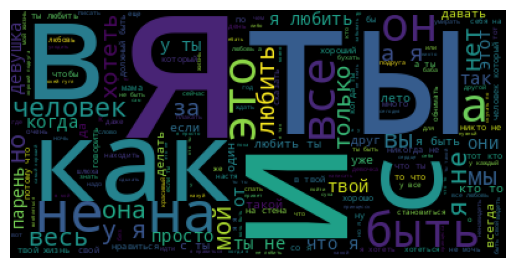

In [97]:
#создадим общий набор слов
super_text = ' '.join(df['text'])

#сгенерим простое облако
cloud = WordCloud().generate(super_text)
plt.imshow(cloud)
plt.axis('off')
plt.show()
#с одной стороны мы получили я, ты, и, человек, то есть понятно, что полуфилософский паблик о смысле жизни.
#с другой стороны хочется что-то более значимое и интересное, кроме предлогов и местоимений. давайте постараемся!

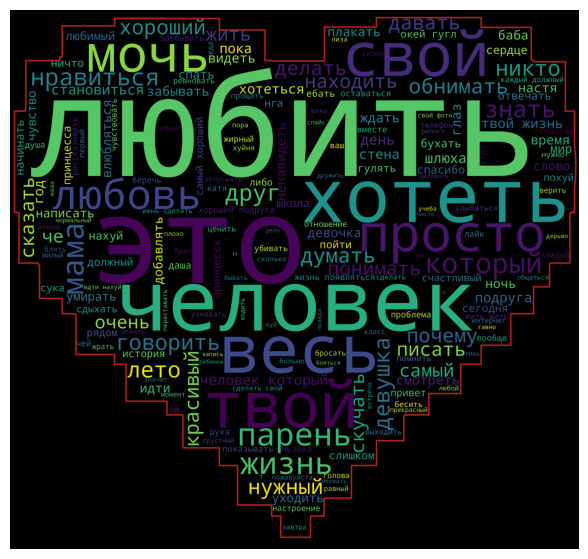

In [95]:
#давайте проверим, вдруг в инфантильном подростково-сопливом паблике самое популярное слово будет любить, было бы мило🥰🥰🥰

#выберем соответствующую маску
mask = np.array(Image.open('/content/1614566890_1-p-kartinka-serdtse-na-belom-fone-1.png'))

#для фильтрации общеупотребимых слов добавим стоп-слова
stop_words = stopwords.words('russian')

#ну и нарисуем облако слов наконец
cloud = WordCloud(stopwords=stop_words, mask=mask, contour_width=20, contour_color='firebrick').generate(super_text)

plt.figure(figsize=(12,7))
plt.imshow(cloud)
plt.axis('off')
plt.show()

##Гипотеза о взаимосвязи времени поста и количестве собираемых лайков

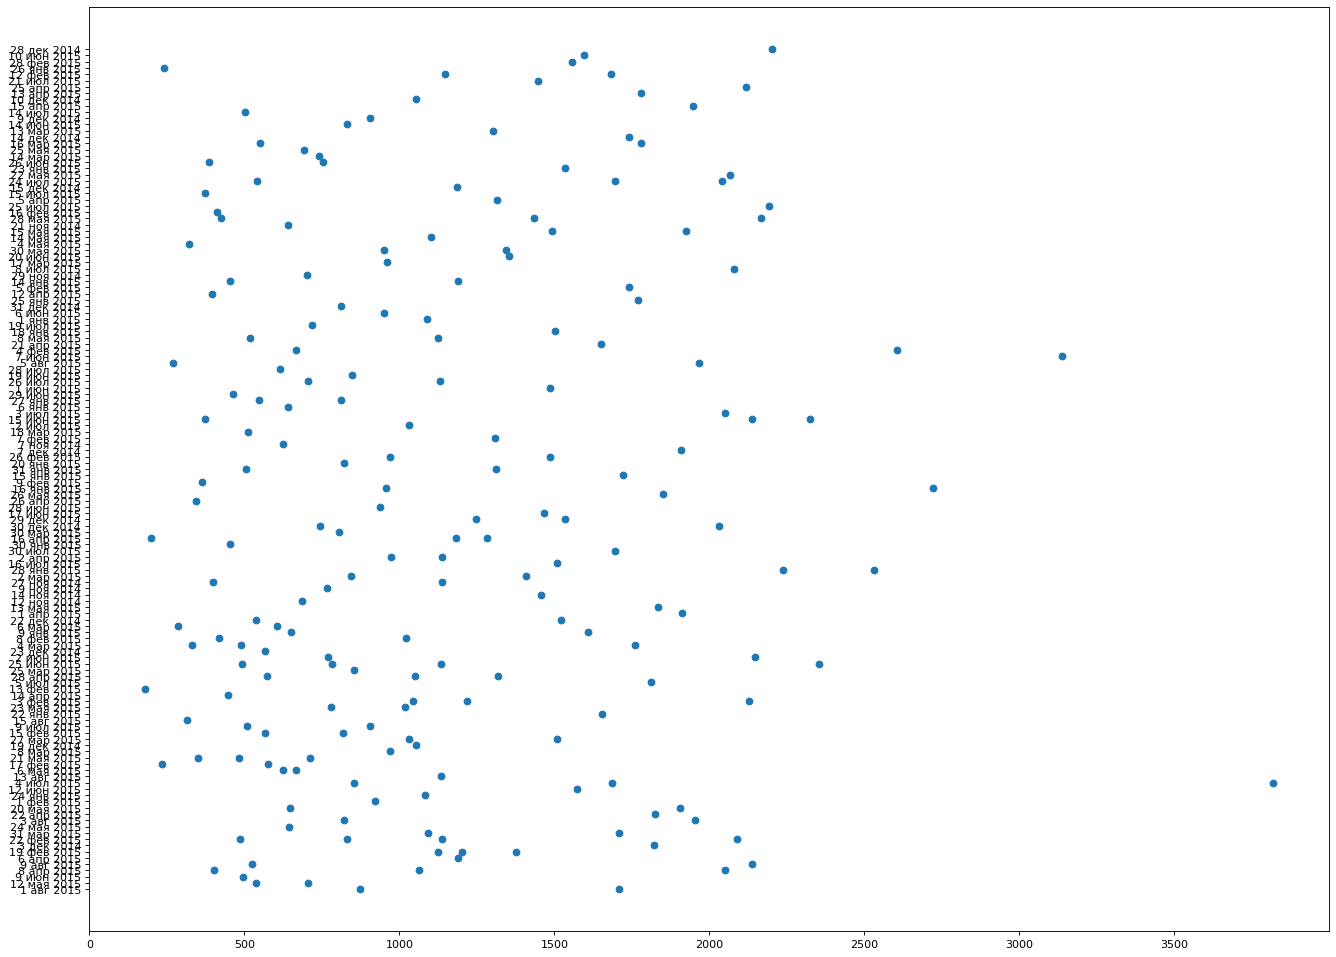

In [99]:
#здесь идея заключается в том, чтобы нарисовать какой-то график, показывающий зависимость даты/времени поста и лайков
#но можно сделать это и по погоде, и чему угодно

figure(figsize=(20, 15), dpi=80)

#пока не понял, как сделать так, чтобы генерация была одна на два столбца, а не две разных
plt.scatter(np.random.choice(df['n_likes'], 200), np.random.choice(df['date'], 200))
plt.show()

#ну, тут можно поиграться, нагенерить(можно и бутрстрапнуть) и усреднить, а потом нарисовать график
#в общем, тут можно играться как хочешь, а я пошел спать, всем спокойной ночи😊😊😊